In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# proj1

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


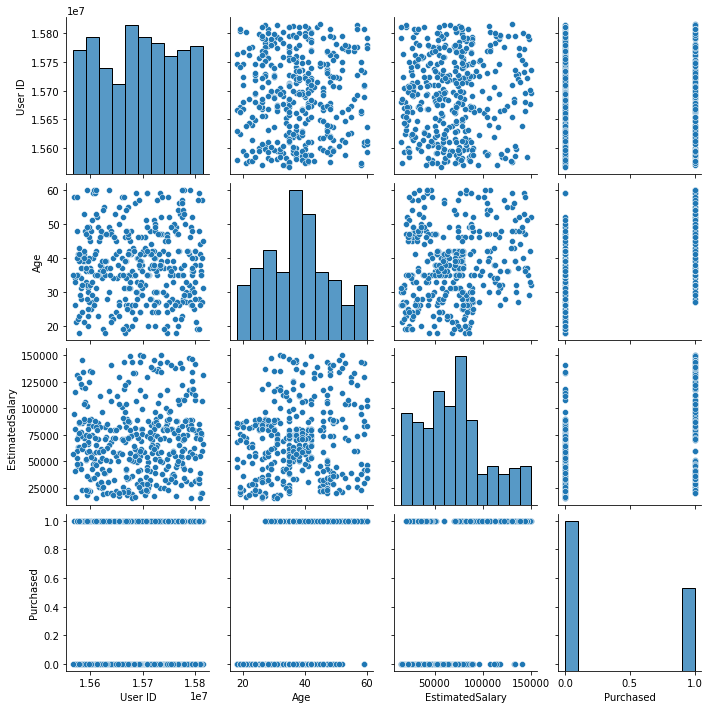

In [4]:
sns.pairplot(df)

In [5]:
df.drop(['User ID','Gender'],axis=1,inplace=True)
df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

In [6]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']
x

Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]

In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [9]:
y_train.value_counts()

0    191
1    109
Name: Purchased, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.93874795, -0.42623273],
       [-0.84354025, -1.24088235],
       [ 2.01269084,  0.20738364],
       [-0.84354025,  0.4185891 ],
       [ 0.01332908, -0.30554389],
       [-1.70040957,  0.38841689],
       [-1.89082498,  0.38841689],
       [ 1.06061381,  0.56945014],
       [-0.84354025, -0.78829922],
       [-1.03395565,  0.56945014],
       [ 0.29895219,  0.0565226 ],
       [ 2.01269084, -1.21071014],
       [ 0.39415989, -0.48657714],
       [ 0.679783  , -1.42191559],
       [-0.55791714,  2.44012704],
       [ 0.7749907 ,  1.44444418],
       [ 1.82227543, -1.09002131],
       [-0.46270944, -1.24088235],
       [ 0.7749907 , -0.30554389],
       [-0.17708633, -0.18485506],
       [ 2.01269084, -0.81847143],
       [ 0.96540611,  0.14703923],
       [ 1.53665232, -1.30122676],
       [-0.46270944, -0.54692156],
       [ 1.44144462,  0.08669481],
       [-0.08187862,  0.72031118],
       [-1.12916335, -1.57277663],
       [-0.27229403, -0.57709377],
       [-0.65312484,

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report

In [13]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [14]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.8366666666666667
Testing Accuracy :0.85
Confusion matrix:
 [[61  5]
 [10 24]]
Recall: 0.7058823529411765
precision: 0.8275862068965517
F1-score: 0.7619047619047619
Fbeta-score: 0.8
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.83      0.71      0.76        34

    accuracy                           0.85       100
   macro avg       0.84      0.82      0.83       100
weighted avg       0.85      0.85      0.85       100

---------------------------------
using KNN: 
Training Accuracy :0.9033333333333333
Testing Accuracy :0.93
Confusion matrix:
 [[60  6]
 [ 1 33]]
Recall: 0.9705882352941176
precision: 0.8461538461538461
F1-score: 0.9041095890410958
Fbeta-score: 0.8684210526315789
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        66
           1       0.85      0.97      0.90        34

    accuracy                     

E:\anacondaa\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy :0.9766666666666667
Testing Accuracy :0.9
Confusion matrix:
 [[59  7]
 [ 3 31]]
Recall: 0.9117647058823529
precision: 0.8157894736842105
F1-score: 0.861111111111111
Fbeta-score: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.82      0.91      0.86        34

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.89       100
weighted avg       0.91      0.90      0.90       100

---------------------------------
using RF: 
Training Accuracy :0.9933333333333333
Testing Accuracy :0.89
Confusion matrix:
 [[57  9]
 [ 2 32]]
Reca

In [15]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

In [16]:
import joblib
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

# proj2

In [25]:
df=pd.read_csv('Titanic.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   NaN      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare Cabin Embarked  Sex_male  
0           A/5 21171   7.2500   NaN        S         1  
1            PC 17599  71.2833   C85        C         0  
2    STON/O2. 3101282   7.9250   NaN        S         0  
3              113803  53.1000  C123        S         0  
4              373450   8.0500   NaN        S         1  
..                ...      ...   ...      ...       ...  
886            211536  13.0000   NaN        S         1  
887            112053  30.0000   B42        S         0  
888        W./C. 6607  23.4500   NaN        S         0  
889            111369  30.0000  C148        C         1  
890            370376   7.7500   NaN        Q         1  

[891 rows x 12 columns]

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_male'],
      dtype='object')

In [41]:
x=df[['Pclass','Pclass','Fare','Sex_male']]
y=df['Survived']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Fare      891 non-null    float64
 3   Sex_male  891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 21.9 KB


In [40]:
x['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [45]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [46]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)

using LR: 
Training Accuracy :0.7823033707865169
Testing Accuracy :0.8156424581005587
Confusion matrix:
 [[98 13]
 [20 48]]
Recall: 0.7058823529411765
precision: 0.7868852459016393
F1-score: 0.7441860465116278
Fbeta-score: 0.7692307692307692
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       111
           1       0.79      0.71      0.74        68

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

---------------------------------
using KNN: 
Training Accuracy :0.8469101123595506
Testing Accuracy :0.8268156424581006
Confusion matrix:
 [[99 12]
 [19 49]]
Recall: 0.7205882352941176
precision: 0.8032786885245902
F1-score: 0.7596899224806202
Fbeta-score: 0.7852564102564101
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76  

E:\anacondaa\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy :0.8792134831460674
Testing Accuracy :0.8212290502793296
Confusion matrix:
 [[99 12]
 [20 48]]
Recall: 0.7058823529411765
precision: 0.8
F1-score: 0.7500000000000001
Fbeta-score: 0.7792207792207791
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       111
           1       0.80      0.71      0.75        68

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

---------------------------------
using RF: 
Training Accuracy :0.9044943820224719
Testing Accuracy :0.8603351955307262
Confusion matrix:
 [[102   9]
 [ 16  52]]
Recall: 0.7647058823529411
precision: 0.8524590163934426
F1-score: 0.8062015503875968
Fbeta-score: 0.8333333333333331
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       111
           1       0.85      0.76      0.81        68

    accuracy 

In [47]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()